In [2]:
import pandas as pd


In [3]:
train = pd.read_csv('nlp_train.csv')
train.shape

(120000, 3)

In [4]:
test = pd.read_csv('nlp_test.csv')
test.shape

(7600, 3)

In [5]:
frames = [train,test]
df = pd.concat(frames)

In [6]:
df.shape

(127600, 3)

In [7]:
df.head(3)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...


In [8]:
print('total shape',df.shape)
print('total columns',df.columns)
print('*'*50)
print(df.info())

total shape (127600, 3)
total columns Index(['Class Index', 'Title', 'Description'], dtype='object')
**************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 127600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  127600 non-null  int64 
 1   Title        127600 non-null  object
 2   Description  127600 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB
None


In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [10]:
df['Class Index'].value_counts()   # Balanced dataset

Class Index
3    31900
4    31900
2    31900
1    31900
Name: count, dtype: int64

In [11]:
g = df.groupby('Class Index')

In [12]:

w = g.get_group(1)              # no warning 
w.head(3)    # 1: World news

,Class Index,Title,Description
492,1,Venezuelans Vote Early in Referendum on Chavez...,Reuters - Venezuelans turned out early\and in ...
493,1,S.Koreans Clash with Police on Iraq Troop Disp...,Reuters - South Korean police used water canno...
494,1,Palestinians in Israeli Jails Start Hunger Str...,Reuters - Thousands of Palestinian\prisoners i...


In [13]:
s = g.get_group(2)  
s.head(3)    # 2 : Sports 

,Class Index,Title,Description
448,2,"Phelps, Thorpe Advance in 200 Freestyle (AP)",AP - Michael Phelps took care of qualifying fo...
449,2,Reds Knock Padres Out of Wild-Card Lead (AP),AP - Wily Mo Pena homered twice and drove in f...
450,2,"Dreaming done, NBA stars awaken to harsh Olymp...",AFP - National Basketball Association players ...


In [14]:
b = g.get_group(3)   
b.head(3)     # 3: Business

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...


In [15]:
sc = g.get_group(4) 
sc.head(3)    # 4: Science

,Class Index,Title,Description
78,4,"'Madden,' 'ESPN' Football Score in Different W...",Reuters - Was absenteeism a little high\on Tue...
79,4,Group to Propose New High-Speed Wireless Forma...,Reuters - A group of technology companies\incl...
80,4,AOL to Sell Cheap PCs to Minorities and Senior...,Reuters - America Online on Thursday said it\p...


In [16]:
labels = {1:'World',2:'Sports',3:'Buisness',4:'Science & Tech'}
df['labels'] = df['Class Index'].map(labels)

In [17]:
df.head()

,Class Index,Title,Description,labels
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Buisness
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Buisness
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Buisness
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Buisness
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Buisness


In [18]:
df['Summary'] = df['Title'] + ' ' + df['Description']
df.drop(columns=['Title', 'Description'],inplace=True)

In [19]:
df.head(3)

,Class Index,labels,Summary
0,3,Buisness,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Buisness,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Buisness,Oil and Economy Cloud Stocks' Outlook (Reuters...


In [20]:
df.labels.value_counts()

labels
Buisness          31900
Science & Tech    31900
Sports            31900
World             31900
Name: count, dtype: int64

<Axes: xlabel='labels'>

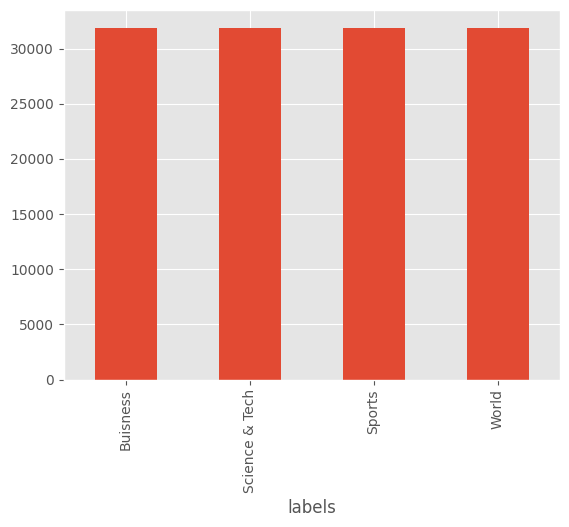

In [21]:
df.labels.value_counts().plot(kind = 'bar')     # Balanced Dataset

In [22]:
df.isnull().sum()

Class Index    0
labels         0
Summary        0
dtype: int64

In [23]:
df.to_csv('df.csv',index = 'False')

In [24]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer    # lemmatize
from wordcloud import WordCloud, STOPWORDS
import string 

# 2. Preprocessing setup
import nltk
#nltk.download("punkt")
#nltk.download("stopwords")

# we already have 'Summary' and 'Class Index'
print(df[["Class Index", "Summary"]].head())


   Class Index                                            Summary
0            3  Wall St. Bears Claw Back Into the Black (Reute...
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...
2            3  Oil and Economy Cloud Stocks' Outlook (Reuters...
3            3  Iraq Halts Oil Exports from Main Southern Pipe...
4            3  Oil prices soar to all-time record, posing new...


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saitejaboda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saitejaboda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#nltk.download('stopwords')

In [27]:
#nltk.download('wordnet')

In [28]:
df1 = pd.read_csv('nlp_train.csv')

df1.head(5)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [29]:
df2 = pd.read_csv('nlp_test.csv')
df2.head(2)

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."


In [30]:
frames = [df1,df2]
df = pd.concat(frames)

In [31]:
df.shape

(127600, 3)

In [32]:
STOP_WORDS = stopwords.words('english')

In [33]:
stopwords = set(STOP_WORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.remove("not")
stopwords.remove("no")
stopwords.add(" ")

In [34]:
world = df.Description[df['Class Index'][df['Class Index']==1].index]

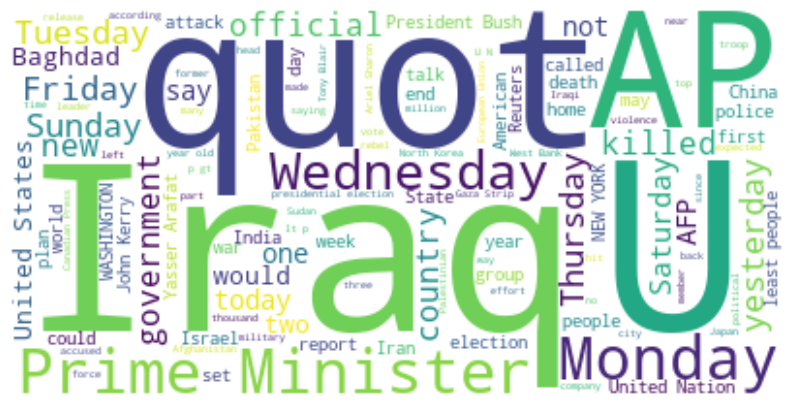

In [35]:
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(world))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
sports = df.Description[df['Class Index'][df['Class Index']==2].index]


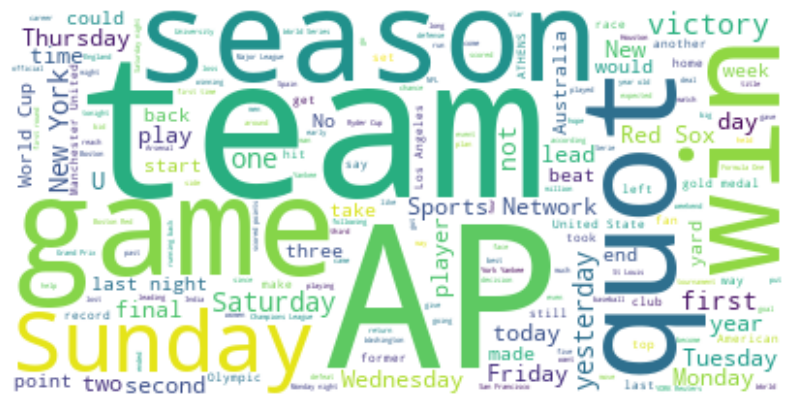

In [37]:
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(sports))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
Buisness = df.Description[df['Class Index'][df['Class Index']==3].index]

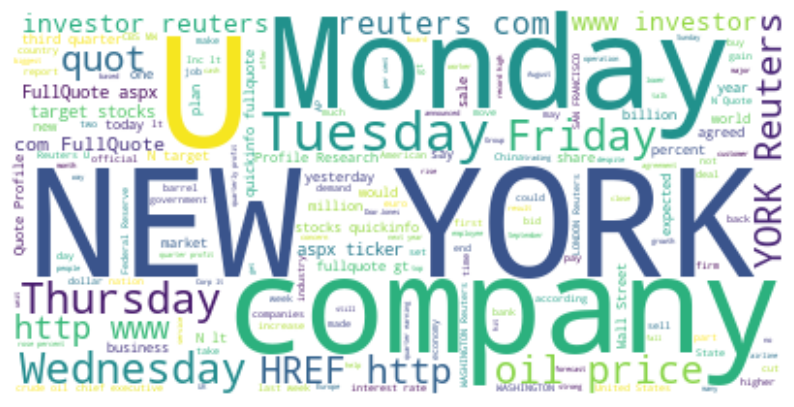

In [39]:
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(Buisness))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
Sci_Tech = df.Description[df['Class Index'][df['Class Index']==4].index]

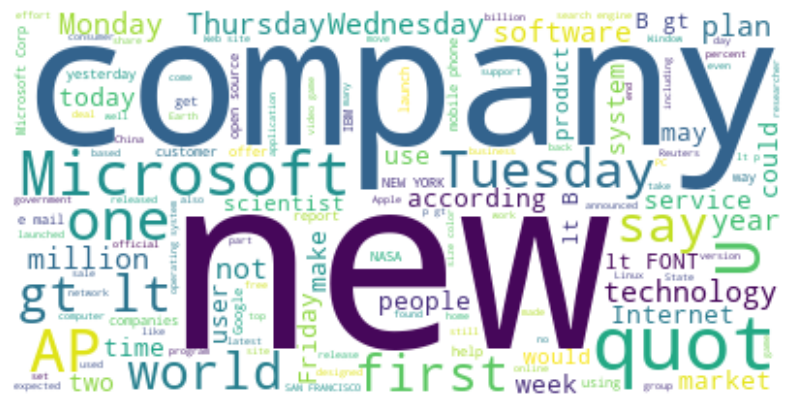

In [41]:
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(Sci_Tech))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
# 2. Preprocessing setup
import nltk
#nltk.download("punkt")
#nltk.download("stopwords")



print(df[["Class Index", "Description"]].head())



   Class Index                                        Description
0            3  Reuters - Short-sellers, Wall Street's dwindli...
1            3  Reuters - Private investment firm Carlyle Grou...
2            3  Reuters - Soaring crude prices plus worries\ab...
3            3  Reuters - Authorities have halted oil export\f...
4            3  AFP - Tearaway world oil prices, toppling reco...


In [43]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [44]:
def text_preproces(x):
    x = str(x).lower()
    x = x.replace('%',' percent').replace('₹',' rupee').replace('$',' dollar').replace('€',' euro')\
                                .replace(',000,000','m').replace('000','k').replace('′',"'").replace("’","'")\
                                .replace("won't","will not").replace("can't",'can not').replace("shouldn't","should not")\
                                .replace("what's",'"what is"').replace("that's",'that is').replace("he's","he is")\
                                .replace("she's","she is").replace("it's","it is").replace("'ve"," have").replace("'re"," are")\
                                .replace("'ll"," will").replace("i'm","i am").replace("n't", " not")
    x = re.sub(r'([0-9]+)000000',r'\1m',x)
    x = re.sub(r'([0-9]+)000',r'\1k',x)
    
    return x 

In [45]:
def extract_features(df):
    df['Description'] = df['Description'].fillna("").apply(text_preproces)

    print("token features...")
    
    return df

In [46]:
df = extract_features(df)

token features...


In [47]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"reuters - short-sellers, wall street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,reuters - private investment firm carlyle grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),reuters - soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,reuters - authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","afp - tearaway world oil prices, toppling reco..."


In [48]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df.Description=df.Description.apply(remove_urls)

In [49]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df.Description=df.Description.apply(remove_html)

In [50]:
def word_tokenize(txt):
    tokens = re.findall("[\w']+", txt)
    return tokens
df.Description=df.Description.apply(word_tokenize)

In [51]:
def remove_stopwords(lst):
    stop=stopwords
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

df.Description=df.Description.apply(remove_stopwords)

In [52]:
def remove_extrawords(lst):
    stop=['href','lt','gt','ii','iii','ie','quot','com']   ## This all words are most repeated words as we observed in WordCloud and it does not make any sense
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

df.Description=df.Description.apply(remove_extrawords)

In [53]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [54]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in  string.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
df.Description=df.Description.apply(remove_punctuations)

In [55]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  string.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
df.Description=df.Description.apply(remove_numbers)

In [56]:
lemmatizer = WordNetLemmatizer()

In [57]:
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
df.Description=df.Description.apply(lemmatzation)

In [58]:
df.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

In [59]:
df.to_csv('df2.csv',index = 'False')

In [60]:
#%pip install distance


In [61]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
import distance
from nltk.stem import WordNetLemmatizer    # lemmatize
from wordcloud import WordCloud, STOPWORDS
import string 
from sklearn.feature_extraction.text import CountVectorizer #Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer # Tfid

In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('df.csv')
df.head()

,Unnamed: 0,Class Index,labels,Summary
0,0,3,Buisness,Wall St. Bears Claw Back Into the Black (Reute...
1,1,3,Buisness,Carlyle Looks Toward Commercial Aerospace (Reu...
2,2,3,Buisness,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,3,Buisness,Iraq Halts Oil Exports from Main Southern Pipe...
4,4,3,Buisness,"Oil prices soar to all-time record, posing new..."


In [64]:
df = df.drop(['Unnamed: 0'],axis = 'columns')

In [65]:
df.shape

(127600, 3)

In [66]:
df.head(2)

,Class Index,labels,Summary
0,3,Buisness,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Buisness,Carlyle Looks Toward Commercial Aerospace (Reu...


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test  = train_test_split(df,test_size=0.2,stratify = df['Class Index'])
X_train, X_val = train_test_split(X_train,test_size=0.20,stratify = X_train['Class Index'])

In [69]:
X_train.shape

(81664, 3)

In [70]:
X_test.shape

(25520, 3)

In [71]:
X_val.shape

(20416, 3)

In [72]:
X_train['Class Index'].value_counts()

Class Index
3    20416
2    20416
4    20416
1    20416
Name: count, dtype: int64

In [73]:
X_test['Class Index'].value_counts()

Class Index
4    6380
2    6380
1    6380
3    6380
Name: count, dtype: int64

In [74]:
X_val['Class Index'].value_counts()

Class Index
1    5104
3    5104
2    5104
4    5104
Name: count, dtype: int64

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [76]:
vectorizer_tf = TfidfVectorizer(tokenizer=None,stop_words=None,max_df=0.75,max_features=2000,lowercase=False,ngram_range=(1,2))
train_vectors = vectorizer_tf.fit_transform(X_train.Summary)   # For train

In [77]:
test_vectors = vectorizer_tf.transform(X_test.Summary)   # for test

In [78]:
val_vectors = vectorizer_tf.transform(X_val.Summary)    # for validation

In [79]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of train_vectors:',train_vectors.shape)
print('Shape of test_vectors:',test_vectors.shape)
print('Shape of val_vectors:',val_vectors.shape)

Shape of X_train: (81664, 3)
Shape of X_test: (25520, 3)
Shape of X_val: (20416, 3)
Shape of train_vectors: (81664, 2000)
Shape of test_vectors: (25520, 2000)
Shape of val_vectors: (20416, 2000)


In [80]:
#vectorizer_tf.get_feature_names()
vectorizer_tf.get_feature_names_out()


array(['000', '10', '100', ..., 'you', 'young', 'your'], dtype=object)

In [81]:
vectorizer_tf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': False,
 'max_df': 0.75,
 'max_features': 2000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [82]:
df.head()

,Class Index,labels,Summary
0,3,Buisness,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Buisness,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Buisness,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Buisness,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,Buisness,"Oil prices soar to all-time record, posing new..."


In [83]:
train_df = pd.DataFrame(train_vectors.toarray(),columns=vectorizer_tf.get_feature_names_out())
train_df = pd.concat([train_df,X_train['Class Index'].reset_index(drop = True)],axis = 1)

train_df

,000,10,100,11,12,13,14,15,151,16,...,years,years ago,yesterday,yesterday that,yesterday to,yet,you,young,your,Class Index
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.250288,0.0,0.0,2
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.276561,0.394823,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,4
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.179216,0.0,0.298219,0.000000,0.000000,0.0,0.0,1
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.197685,0.000000,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81659,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,4
81660,0.161042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,1
81661,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,2
81662,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3


In [84]:
test_df = pd.DataFrame(test_vectors.toarray(),columns=vectorizer_tf.get_feature_names_out())
test_df = pd.concat([test_df,X_test['Class Index'].reset_index(drop = True)],axis = 1)

test_df

,000,10,100,11,12,13,14,15,151,16,...,years,years ago,yesterday,yesterday that,yesterday to,yet,you,young,your,Class Index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266194,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.136607,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
25516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282679,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
25517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
25518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3


In [85]:
val_df = pd.DataFrame(val_vectors.toarray(),columns=vectorizer_tf.get_feature_names_out())
val_df = pd.concat([val_df,X_val['Class Index'].reset_index(drop = True)],axis = 1)

val_df

,000,10,100,11,12,13,14,15,151,16,...,years,years ago,yesterday,yesterday that,yesterday to,yet,you,young,your,Class Index
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20411,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
20412,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
20413,0.213469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
20414,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [86]:
train_df.to_csv('train_df.csv',index ='False')

In [87]:
test_df.to_csv('test_df.csv',index ='False')

In [88]:
val_df.to_csv('val_df.csv',index ='False')

In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [90]:
train_df = pd.read_csv('train_df.csv')

In [91]:
train_df = train_df.drop(['Unnamed: 0'],axis = 'columns')

In [92]:
train_df.head(3)

,000,10,100,11,12,13,14,15,151,16,...,years,years ago,yesterday,yesterday that,yesterday to,yet,you,young,your,Class Index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.250288,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.276561,0.394823,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4


In [93]:
X_train = train_df.drop(['Class Index'],axis = 'columns')

In [94]:
y_train = train_df['Class Index']

In [95]:
y_train.shape

(81664,)

In [96]:
X_train.shape

(81664, 2000)

In [97]:
test_df = pd.read_csv('test_df.csv')

In [98]:
test_df = test_df.drop(['Unnamed: 0'],axis = 'columns')

In [99]:
test_df.head(3)

,000,10,100,11,12,13,14,15,151,16,...,years,years ago,yesterday,yesterday that,yesterday to,yet,you,young,your,Class Index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266194,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [100]:
X_test = test_df.drop(['Class Index'],axis = 'columns')

In [101]:
y_test = test_df['Class Index']

In [102]:
X_test.shape

(25520, 2000)

In [103]:
val_df = pd.read_csv('val_df.csv')

In [104]:
val_df = val_df.drop(['Unnamed: 0'],axis = 'columns')
val_df.head(3)

,000,10,100,11,12,13,14,15,151,16,...,years,years ago,yesterday,yesterday that,yesterday to,yet,you,young,your,Class Index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [105]:
X_val = val_df.drop(['Class Index'],axis = 'columns')
y_val = val_df['Class Index']
X_val.shape

(20416, 2000)

In [106]:
y_val.shape

(20416,)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [108]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#sklearn.linear_model.LogisticRegression
lr_model = LogisticRegression(penalty='l2',solver= 'newton-cg',multi_class= 'multinomial')
# L2 = L2 regularization helps to overcome (overfitting vs underfitting)
# solver = newton-cg ... For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
lr_model.fit(X_train,y_train)
pred = lr_model.predict(X_val)

In [109]:
print("first 20 actual labels")
print(y_val.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[1, 3, 2, 4, 3, 1, 4, 3, 2, 4, 1, 2, 4, 3, 3, 4, 4, 1, 4, 3]
first 20 predicted labels
[1, 3, 2, 4, 3, 1, 4, 3, 2, 1, 1, 2, 4, 3, 3, 4, 4, 1, 4, 3]


In [110]:
def confusion_mat(color):
    cof=confusion_matrix(y_val, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

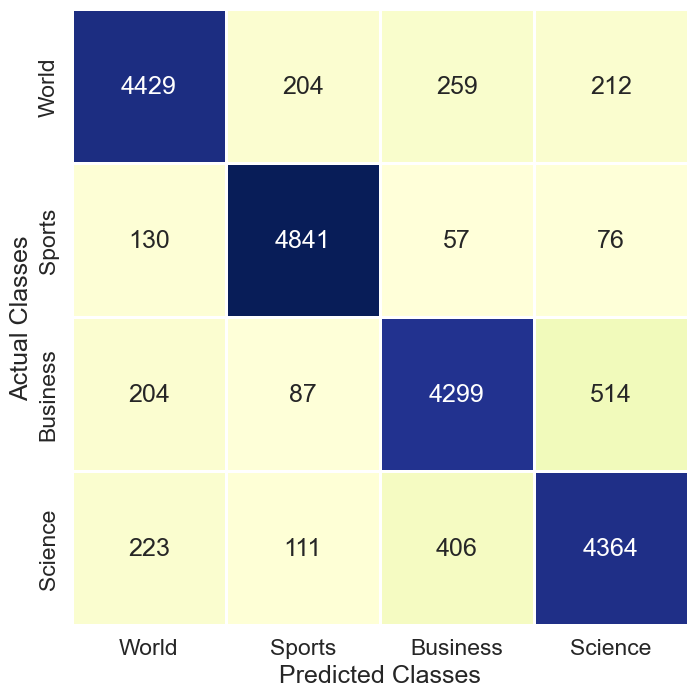

In [111]:
confusion_mat('YlGnBu')

In [112]:
print('\nClassification Report\n')
print(classification_report(y_val,pred))


Classification Report

              precision    recall  f1-score   support

           1       0.89      0.87      0.88      5104
           2       0.92      0.95      0.94      5104
           3       0.86      0.84      0.85      5104
           4       0.84      0.86      0.85      5104

    accuracy                           0.88     20416
   macro avg       0.88      0.88      0.88     20416
weighted avg       0.88      0.88      0.88     20416



In [113]:
a1 = round(accuracy_score(y_val,pred)*100,4)
a2 = round(100-accuracy_score(y_val,pred)*100,4)
print('Accuracy:',a1)
print('Error:',a2)

Accuracy: 87.838
Error: 12.162


In [114]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.linear_model import SGDClassifier

In [115]:
sgd_model = SGDClassifier(early_stopping=True,penalty='l2',alpha=0.00001)
sgd_model.fit(X_train,y_train)
pred_sgd = sgd_model.predict(X_val)

In [116]:
print("first 20 actual labels")
print(y_val.tolist()[:20])
print("first 20 predicted labels")
print(pred_sgd.tolist()[:20])

first 20 actual labels
[1, 3, 2, 4, 3, 1, 4, 3, 2, 4, 1, 2, 4, 3, 3, 4, 4, 1, 4, 3]
first 20 predicted labels
[1, 3, 2, 4, 3, 1, 4, 3, 2, 1, 1, 2, 4, 3, 3, 4, 4, 1, 4, 3]


In [117]:
def confusion_mat(color):
    cof=confusion_matrix(y_val, pred_sgd)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");


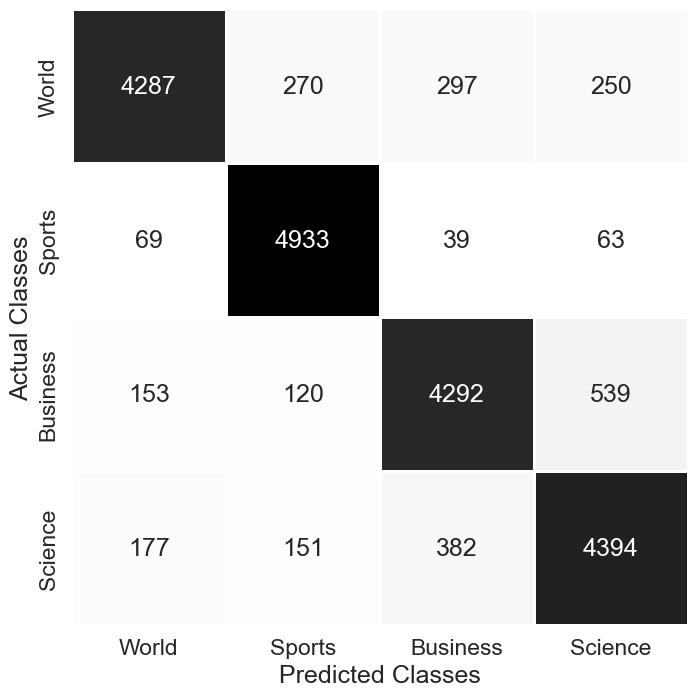

In [118]:
confusion_mat('Greys')

In [119]:
print('\nClassification Report\n')
print((classification_report(y_val,pred_sgd)))


Classification Report

              precision    recall  f1-score   support

           1       0.91      0.84      0.88      5104
           2       0.90      0.97      0.93      5104
           3       0.86      0.84      0.85      5104
           4       0.84      0.86      0.85      5104

    accuracy                           0.88     20416
   macro avg       0.88      0.88      0.88     20416
weighted avg       0.88      0.88      0.88     20416



In [120]:
b1 = round(accuracy_score(y_val,pred_sgd)*100,4)
b2 = round(100-accuracy_score(y_val,pred_sgd)*100,4)
print('Accuracy:',b1)
print('Error:',b2)

Accuracy: 87.7057
Error: 12.2943


In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model.fit(X_train,y_train)
pred_dtg = dt_model.predict(X_val)


In [123]:
print("first 20 actual labels")
print(y_val.tolist()[:20])
print("first 20 predicted labels")
print(pred_dtg.tolist()[:20])

first 20 actual labels
[1, 3, 2, 4, 3, 1, 4, 3, 2, 4, 1, 2, 4, 3, 3, 4, 4, 1, 4, 3]
first 20 predicted labels
[1, 3, 2, 4, 3, 1, 4, 3, 2, 1, 2, 2, 4, 3, 3, 4, 4, 4, 4, 3]


In [124]:
def confusion_mat(color):
    cof=confusion_matrix(y_val, pred_dtg)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");


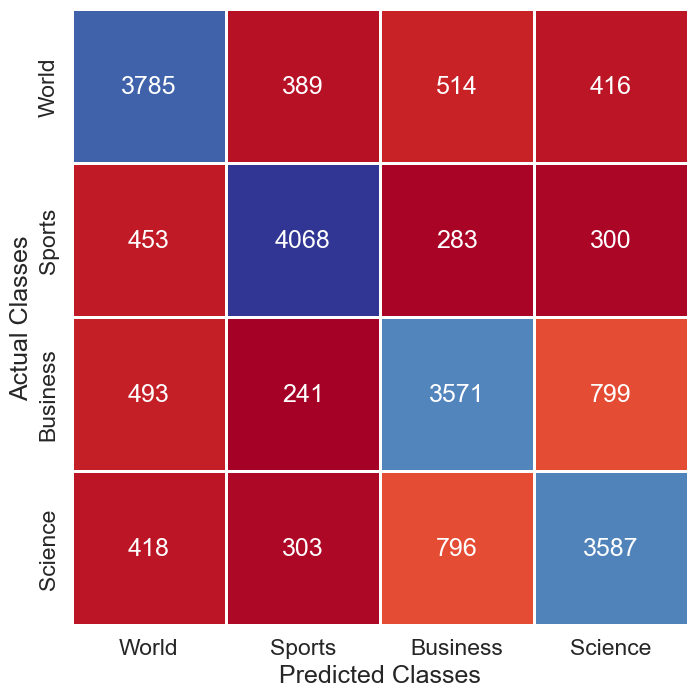

In [125]:
confusion_mat('RdYlBu')

In [126]:
print('\nClassification Report\n')
print((classification_report(y_val,pred_dtg)))


Classification Report

              precision    recall  f1-score   support

           1       0.74      0.74      0.74      5104
           2       0.81      0.80      0.81      5104
           3       0.69      0.70      0.70      5104
           4       0.70      0.70      0.70      5104

    accuracy                           0.74     20416
   macro avg       0.74      0.74      0.74     20416
weighted avg       0.74      0.74      0.74     20416



In [127]:
c1 = round(accuracy_score(y_val,pred_dtg)*100,4)
c2 = round(100-accuracy_score(y_val,pred_dtg)*100,4)
print('Accuracy:',c1)
print('Error:',c2)

Accuracy: 73.5257
Error: 26.4743


first 20 actual labels
[1, 3, 2, 4, 3, 1, 4, 3, 2, 4, 1, 2, 4, 3, 3, 4, 4, 1, 4, 3]
first 20 predicted labels
[1, 3, 2, 4, 3, 1, 4, 3, 2, 1, 1, 2, 4, 4, 3, 4, 4, 1, 4, 3]

Classification Report

              precision    recall  f1-score   support

           1       0.87      0.86      0.86      5104
           2       0.90      0.95      0.93      5104
           3       0.85      0.79      0.82      5104
           4       0.81      0.83      0.82      5104

    accuracy                           0.86     20416
   macro avg       0.86      0.86      0.86     20416
weighted avg       0.86      0.86      0.86     20416

Accuracy: 85.6926
Error: 14.3074


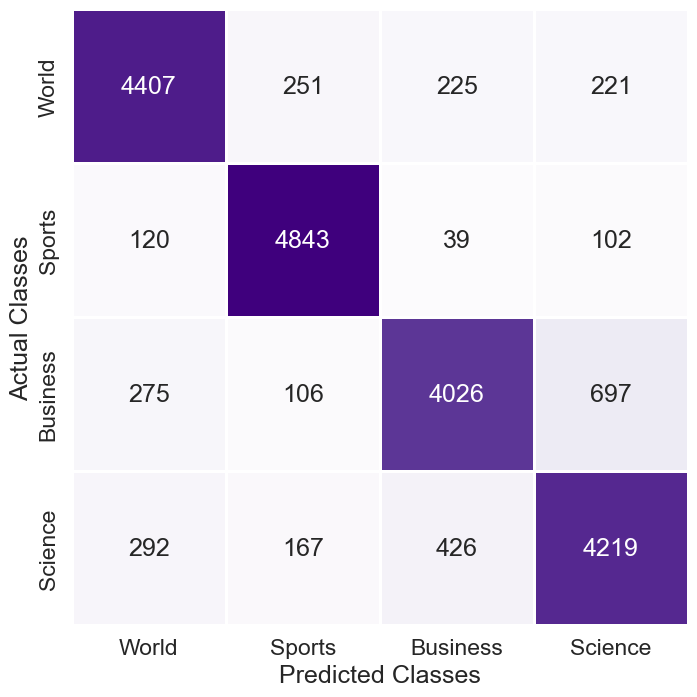

In [128]:
# ==============================
# Naive Bayes Classifier
# ==============================
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
pred_nb = nb_model.predict(X_val)

print("first 20 actual labels")
print(y_val.tolist()[:20])
print("first 20 predicted labels")
print(pred_nb.tolist()[:20])

def confusion_mat(color):
    cof = confusion_matrix(y_val, pred_nb)
    cof = pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));
    sns.heatmap(cof, cmap=color, linewidths=1, annot=True, square=True, fmt='d',
                cbar=False, xticklabels=['World','Sports','Business','Science'],
                yticklabels=['World','Sports','Business','Science'])
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

confusion_mat('Purples')

print('\nClassification Report\n')
print(classification_report(y_val, pred_nb))

d1 = round(accuracy_score(y_val, pred_nb)*100,4)
d2 = round(100-accuracy_score(y_val, pred_nb)*100,4)
print('Accuracy:', d1)
print('Error:', d2)



first 20 actual labels
[1, 3, 2, 4, 3, 1, 4, 3, 2, 4, 1, 2, 4, 3, 3, 4, 4, 1, 4, 3]
first 20 predicted labels
[1, 3, 2, 4, 3, 1, 4, 3, 2, 1, 1, 2, 4, 3, 3, 4, 4, 1, 4, 3]

Classification Report

              precision    recall  f1-score   support

           1       0.89      0.86      0.88      5104
           2       0.92      0.95      0.94      5104
           3       0.85      0.84      0.85      5104
           4       0.85      0.86      0.85      5104

    accuracy                           0.88     20416
   macro avg       0.88      0.88      0.88     20416
weighted avg       0.88      0.88      0.88     20416

Accuracy: 87.9065
Error: 12.0935


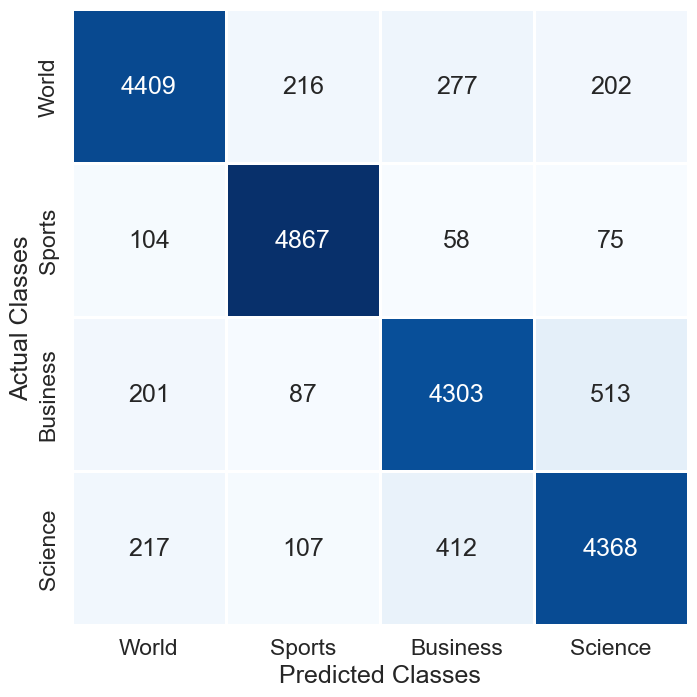

In [129]:
# ==============================
# Support Vector Machine (LinearSVC)
# ==============================
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
pred_svm = svm_model.predict(X_val)

print("first 20 actual labels")
print(y_val.tolist()[:20])
print("first 20 predicted labels")
print(pred_svm.tolist()[:20])

def confusion_mat(color):
    cof = confusion_matrix(y_val, pred_svm)
    cof = pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));
    sns.heatmap(cof, cmap=color, linewidths=1, annot=True, square=True, fmt='d',
                cbar=False, xticklabels=['World','Sports','Business','Science'],
                yticklabels=['World','Sports','Business','Science'])
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

confusion_mat('Blues')

print('\nClassification Report\n')
print(classification_report(y_val, pred_svm))

e1 = round(accuracy_score(y_val, pred_svm)*100,4)
e2 = round(100-accuracy_score(y_val, pred_svm)*100,4)
print('Accuracy:', e1)
print('Error:', e2)


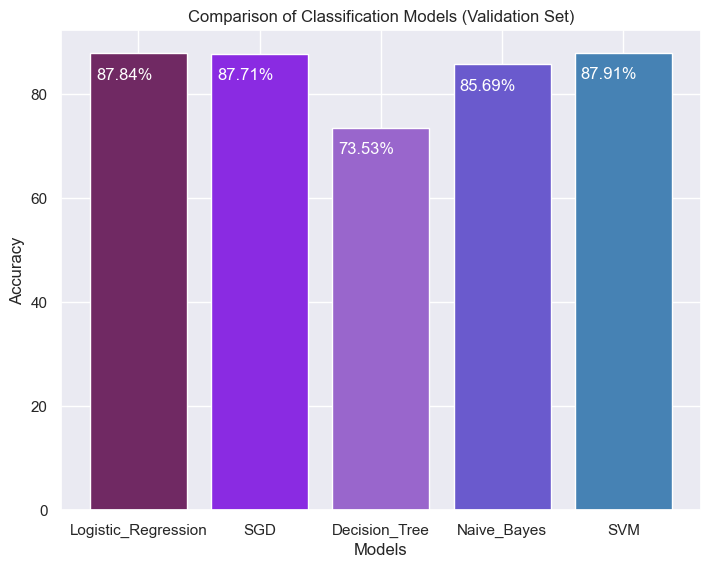

In [130]:
## (Validation Set)

sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ["Logistic_Regression","SGD","Decision_Tree","Naive_Bayes","SVM"]
Accuracy = [a1,b1,c1,d1,e1]
ax.bar(Models, Accuracy, color=['#702963','#8a2be2','#9966cc','#6a5acd','#4682b4'])
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-5, str(round(i.get_height(),2))+'%', fontsize=12, color='white')
plt.title('Comparison of Classification Models (Validation Set)');
plt.ylabel('Accuracy');
plt.xlabel('Models');
plt.show()

In [131]:
###
# Test Set Evaluation - Logistic Regression
###
pred_lr_for_unseen = lr_model.predict(X_test)
a11 = round(accuracy_score(y_test,pred_lr_for_unseen)*100,4)
a22 = round(100-accuracy_score(y_test,pred_lr_for_unseen)*100,4)
print('Accuracy:',a11)
print('Error:',a22)

Accuracy: 87.9663
Error: 12.0337


In [132]:
###
# Test Set Evaluation - SGDClassifier
###
pred_sgd_for_unseen = sgd_model.predict(X_test)
b11 = round(accuracy_score(y_test,pred_sgd_for_unseen)*100,4)
b22 = round(100-accuracy_score(y_test,pred_sgd_for_unseen)*100,4)
print('Accuracy:',b11)
print('Error:',b22)

Accuracy: 87.935
Error: 12.065


In [133]:
###
# Test Set Evaluation - Decision Tree
###
pred_dtg_for_unseen = dt_model.predict(X_test)
c11 = round(accuracy_score(y_test,pred_dtg_for_unseen)*100,4)
c22 = round(100-accuracy_score(y_test,pred_dtg_for_unseen)*100,4)
print('Accuracy:',c11)
print('Error:',c22)

Accuracy: 73.6873
Error: 26.3127


In [134]:
###
# Test Set Evaluation - Naive Bayes
###
pred_nb_for_unseen = nb_model.predict(X_test)

d11 = round(accuracy_score(y_test, pred_nb_for_unseen)*100,4)
d22 = round(100-accuracy_score(y_test, pred_nb_for_unseen)*100,4)
print('Naive Bayes - Test Accuracy:', d11)
print('Naive Bayes - Test Error:', d22)


Naive Bayes - Test Accuracy: 85.9444
Naive Bayes - Test Error: 14.0556


In [135]:
###
# Test Set Evaluation - SVM
###
pred_svm_for_unseen = svm_model.predict(X_test)

e11 = round(accuracy_score(y_test, pred_svm_for_unseen)*100,4)
e22 = round(100-accuracy_score(y_test, pred_svm_for_unseen)*100,4)
print('SVM - Test Accuracy:', e11)
print('SVM - Test Error:', e22)

SVM - Test Accuracy: 88.0878
SVM - Test Error: 11.9122


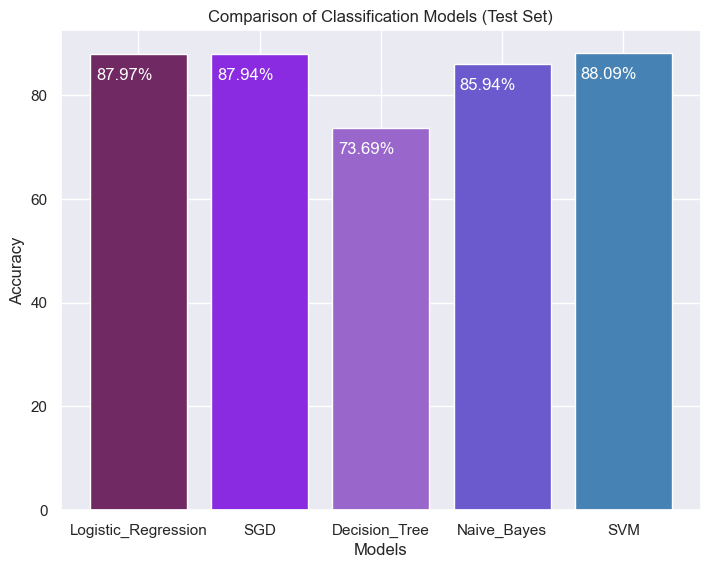

In [136]:
# ==============================
# Update Model Comparison (Test Set)
# ==============================
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ["Logistic_Regression","SGD","Decision_Tree","Naive_Bayes","SVM"]
Accuracy = [a11,b11,c11,d11,e11]
ax.bar(Models, Accuracy, color=['#702963','#8a2be2','#9966cc','#6a5acd','#4682b4'])
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-5, str(round(i.get_height(),2))+'%', fontsize=12, color='white')
plt.title('Comparison of Classification Models (Test Set)');
plt.ylabel('Accuracy');
plt.xlabel('Models');
plt.show()


===== Model Performance Comparison (Test Set) =====

                     Precision  Recall  F1-Score  Accuracy
Logistic Regression     0.8794  0.8797    0.8795    0.8797
SGD                     0.8799  0.8793    0.8790    0.8793
Decision Tree           0.7368  0.7369    0.7367    0.7369
Naive Bayes             0.8590  0.8594    0.8587    0.8594
SVM                     0.8806  0.8809    0.8806    0.8809


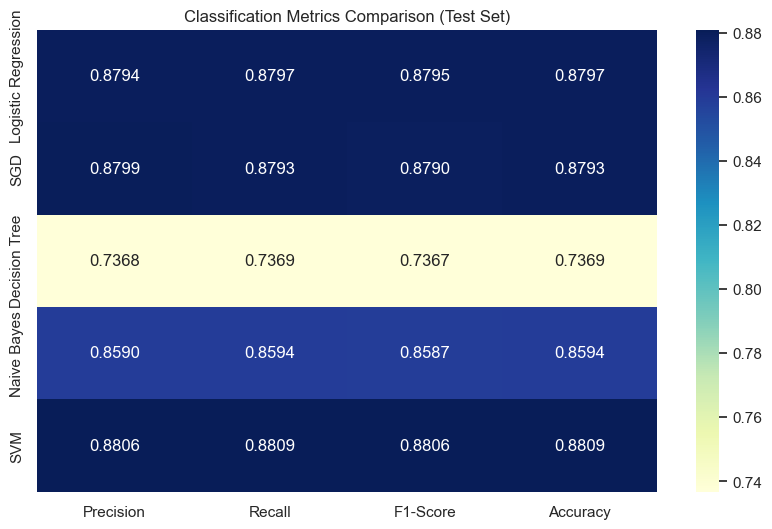

In [137]:
# ==============================
# Classification Reports (Test Set) - All Models
# ==============================
from sklearn.metrics import classification_report

# Generate reports as dicts
report_lr  = classification_report(y_test, pred_lr_for_unseen,  output_dict=True)
report_sgd = classification_report(y_test, pred_sgd_for_unseen, output_dict=True)
report_dt  = classification_report(y_test, pred_dtg_for_unseen, output_dict=True)
report_nb  = classification_report(y_test, pred_nb_for_unseen,  output_dict=True)
report_svm = classification_report(y_test, pred_svm_for_unseen, output_dict=True)

# Extract only weighted avg (overall) metrics
def extract_scores(report):
    return {
        "Precision": report["weighted avg"]["precision"],
        "Recall":    report["weighted avg"]["recall"],
        "F1-Score":  report["weighted avg"]["f1-score"],
        "Accuracy":  report["accuracy"]
    }

comparison = pd.DataFrame({
    "Logistic Regression": extract_scores(report_lr),
    "SGD":                 extract_scores(report_sgd),
    "Decision Tree":       extract_scores(report_dt),
    "Naive Bayes":         extract_scores(report_nb),
    "SVM":                 extract_scores(report_svm)
})

# Transpose for readability
comparison = comparison.T
print("\n===== Model Performance Comparison (Test Set) =====\n")
print(comparison.round(4))

# Optional: Pretty heatmap
plt.figure(figsize=(10,6))
sns.heatmap(comparison, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Classification Metrics Comparison (Test Set)")
plt.show()


In [140]:
import pickle

# Save Logistic Regression model
with open("svm_nlp.pkl", "wb") as f:
    pickle.dump(svm_model, f)

# Save TF-IDF vectorizer (important for preprocessing)
with open("vectorizer_svm.pkl", "wb") as f:
    pickle.dump(vectorizer_tf, f)
